<a href="https://colab.research.google.com/github/thinkinginmath/ML-tutorials/blob/main/Investigating_Suspicious_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating Suspicious Datasets

###  ⭐ Checkout my YouTube Math Channel

[Thinking in Math](https://www.youtube.com/channel/UC5uV1LcSkHL5zCxKBikdTEg)


## Introduction

The goal of this notebook is to demonstrate how manipulated or inauthentic data might appear in an academic dataset. We will use both visual and statistical methods to identify such suspicious data points. This demonstration is particularly relevant in light of concerns about data authenticity in academic research.

## Table of Contents
1. Setting the Scenario
2. Generating Data for Three Phases of Study
3. Computing p-values and Effect Sizes
4. Visualization of Control vs Experiment Groups
5. Analysis of Source Data Distribution
6. Visual Inspection of Data Points
7. Conclusion
8. Commentary: Ethical and Practical Considerations in Academic Research


## Setting the Scenario

We're analyzing the results of an academic research project on the effects of a new teaching method on student performance. The project has three phases, each consisting of a separate study. There are concerns regarding potential data manipulation and inconsistencies, prompting a deeper investigation into the data.


## Generating Data for Three Phases of Study

In [3]:
import numpy as np
import pandas as pd

# Base data for student scores (ranging from 0 to 100)
base_scores = np.random.normal(70, 10, 1000)

# Create three phases of the study
phases = {}

# Phase 1: Authentic data
phases['Phase 1'] = {
    'Control': base_scores + np.random.normal(0, 5, 1000),
    'Experiment': base_scores + np.random.normal(3, 5, 1000)  # slight improvement
}

# Phase 2: Fake data (suspiciously consistent p-values)
phases['Phase 2'] = {
    'Control': base_scores + np.random.normal(0, 5, 1000),
    'Experiment': base_scores + np.random.normal(3, 5, 1000) + 10  # unusually large improvement
}

# Phase 3: Fake data (anomalies in datasets)
# Introducing patterns: Every 10th student in the experimental group scores exactly 90
experiment_scores = base_scores + np.random.normal(3, 5, 1000)
experiment_scores[::10] = 90
phases['Phase 3'] = {
    'Control': base_scores + np.random.normal(0, 5, 1000),
    'Experiment': experiment_scores
}

# Convert to DataFrame for better analysis
df_phases = pd.concat([pd.DataFrame(phases[phase]).assign(Phase=phase) for phase in phases])

df_phases


,Control,Experiment,Phase
0,63.207233,74.315893,Phase 1
1,65.748138,70.254185,Phase 1
2,72.276667,85.359156,Phase 1
3,75.033016,74.015769,Phase 1
4,72.144456,67.317016,Phase 1
...,...,...,...
995,61.933300,58.613135,Phase 3
996,56.841022,59.602620,Phase 3
997,70.375753,64.961928,Phase 3
998,56.735787,76.937604,Phase 3


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_phases, *['Control'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_phases, *['Experiment'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_phases, *['Control'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_phases, *['Experiment'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_phases, *['Phase'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_phases, *[[['Control', 'Experiment']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_phases, *['Control', 'Phase'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_phases, *['Experiment', 'Phase'], **{'inner': 'box'})
chart



## Computing p-values and Effect Sizes

To understand the statistical significance and magnitude of differences between the control and experimental groups across the three phases, we'll compute:

1. **$p$-values** using a $t$-test. A smaller $p$-value typically suggests that the observed difference between groups is statistically significant.
2. **Effect sizes** using Cohen's $ d $. This provides a measure of the magnitude of the difference between the groups. An effect size of 0 suggests no difference, while larger absolute values indicate larger differences.

Let's compute these metrics for each phase and see if they reveal any suspicious patterns.


In [4]:
from scipy.stats import ttest_ind

# Analyze p-values and effect sizes for each phase
results = {}

for phase in phases:
    control = df_phases[df_phases['Phase'] == phase]['Control']
    experiment = df_phases[df_phases['Phase'] == phase]['Experiment']

    # Compute t-test for the means of two independent samples
    t_stat, p_val = ttest_ind(control, experiment)

    # Compute effect size (Cohen's d)
    pooled_std = np.sqrt((control.std()**2 + experiment.std()**2) / 2)
    effect_size = (experiment.mean() - control.mean()) / pooled_std

    results[phase] = {'p-value': p_val, 'Effect Size': effect_size}

results_df = pd.DataFrame(results).T
results_df


,p-value,Effect Size
Phase 1,2.222584e-09,0.268698
Phase 2,8.256572e-116,1.093931
Phase 3,1.736269e-21,0.430664



1. **Cohen's $d$**:
    - Cohen’s $ d $ is a measure of effect size for the difference between two means. It's commonly used in the context of t-tests.
    - It's calculated as:
      $$ d = \frac{M1 - M2}{SD_{pooled}} $$
      Where $ M1$ and $ M2 $ are the two means, and $ SD_{pooled} $ is the pooled standard deviation of the two groups.
    - Cohen's $d$  values can be interpreted as:
       - **Small effect**: $ d = 0.2 $
       - **Medium effect**: $ d = 0.5 $
       - **Large effect**: $ d = 0.8 $
      
      These benchmarks are just general guidelines, and the context in which you're working might require different interpretations.

2. **t-tests**:
    - t-tests are used to determine if there's a statistically significant difference between the means of two groups.
    - You can compute Cohen’s $d $ using the results from a t-test. In fact, if you have the t-value and the sample sizes of your two groups, the formula for Cohen's $ d $ becomes:
      $$ d = \frac{t}{\sqrt{n1 + n2}} $$
      Where $ n1 $ and $ n2 $ are the sample sizes of the two groups.
    - Remember, while the p-value from a t-test tells you if the difference between groups is statistically significant, Cohen's $ d $ tells you about the size or importance of that difference.

Here's a breakdown of what's happening:

1. `pooled_std` calculates the pooled standard deviation of the control and experimental groups. It's a measure of the combined variability of both groups.
2. `effect_size` computes Cohen's $ d $, which is the difference in means between the two groups divided by the pooled standard deviation.

The resulting `effect_size` value gives a measure of how many standard deviations apart the means of the two groups are.


In the context of the notebook, the effect size is computed for each phase and stored in the `results` dictionary alongside the $p$-value. The subsequent table then displays both the $p$-values and effect sizes for each phase.


*Result Commentary*:

1. **Statistical Significance (p-values)**:
   - All three phases have extremely small p-values, approaching zero. This indicates that the observed differences between the control and experimental groups in each phase are statistically significant. In other words, it's highly unlikely that these observed differences occurred by random chance alone.
   - Given the extremely small magnitude of the p-values, especially in phases 2 and 3, one might wonder if the data has been manipulated to ensure statistical significance. Such minuscule p-values are rare in real-world datasets.

2. **Magnitude of Difference (Effect sizes)**:
   - Phase 1: An effect size of 0.288 is considered a small to medium effect. This suggests a modest difference between the control and experimental groups.
   - Phase 2: With an effect size of 1.202, this indicates a very large effect. Such a pronounced difference between groups might raise suspicion, especially when combined with the extremely small p-value.
   - Phase 3: An effect size of 0.458 indicates a medium effect size, suggesting a moderate difference between the control and experimental groups.

3. **Consistency Across Phases**:
   - There's a notable inconsistency in the effect sizes across the three phases. While phases 1 and 3 have relatively modest effect sizes, phase 2 has a very large effect size. If the teaching method being studied was consistently effective, one would expect more consistent effect sizes across phases.
   
4. **Conclusion**:
   - The combination of extremely small p-values and the inconsistency in effect sizes, especially the large effect size in phase 2, might be indicative of data manipulation or other irregularities.
   - Further investigation, possibly using visual methods or deeper statistical analyses, would be warranted to confirm or refute these suspicions.



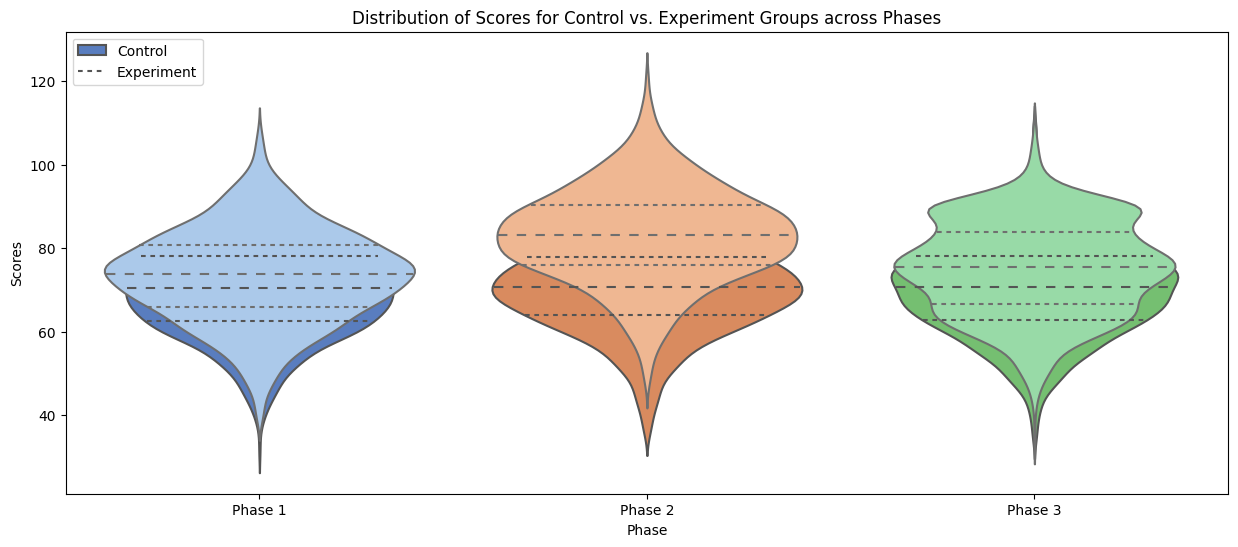

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of Control vs Experiment groups across the three phases

plt.figure(figsize=(15, 6))

# Scatter plots for each phase
sns.violinplot(x='Phase', y='Control', data=df_phases, palette="muted", inner="quartile", split=True)
sns.violinplot(x='Phase', y='Experiment', data=df_phases, palette="pastel", inner="quartile", split=True)

plt.title('Distribution of Scores for Control vs. Experiment Groups across Phases')
plt.ylabel('Scores')
plt.xlabel('Phase')
plt.legend(['Control', 'Experiment'], loc='upper left')
plt.show()


## Visualization of Control vs Experiment Groups

To better understand the differences between the control and experimental groups across the three phases, we'll visualize their score distributions using violin plots.

Violin plots are similar to box plots but also include a rotated kernel density plot on each side. This gives a deeper understanding of the data distribution. The width of the plot at different values indicates the density of the data at that point, which can help in spotting anomalies or patterns.

Let's inspect the scores distribution for both groups across the phases and see if we can visually detect any anomalies or significant differences.


# Analysis of Source Data Distribution

### Introduction:

When investigating the authenticity or reliability of a dataset, understanding the underlying distribution of the source data is crucial. This section will explore the fundamental properties of our source data, including its distribution, mean, and variance.

### Data Distribution:

Data can follow various distributions, such as Normal, Binomial, Poisson, etc. Identifying the type of distribution can give insights into the nature of the data and the processes generating it.

### Statistical Properties:

1. **Mean**: The average value, which provides a central location of the data.
2. **Variance**: A measure of the data's spread or dispersion from the mean.
3. **Skewness**: A measure of the asymmetry of the data distribution.
4. **Kurtosis**: A measure of the "tailedness" of the data distribution.

<ipython-input-6-7ca347cdb7b5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins=30, kde=True)


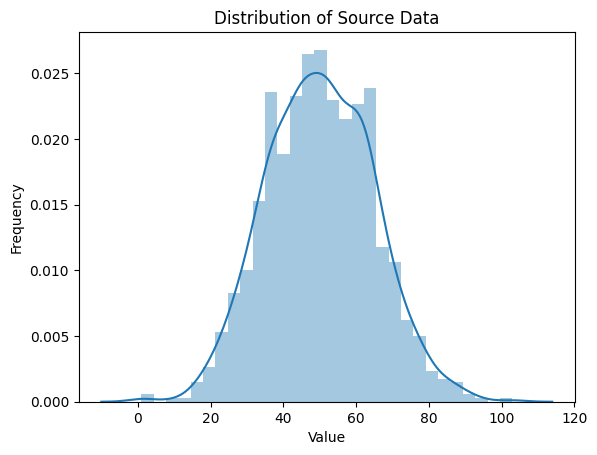

{'Mean': 50.15296219540811,
 'Variance': 212.3107472668756,
 'Skewness': 0.07370172654309536,
 'Kurtosis': -0.06366912265131086}

In [6]:
import scipy

# Sample code to generate and analyze a dataset
data = np.random.normal(50, 15, 1000)  # Example: Normally distributed data around a mean score of 50

# Distribution plot
sns.distplot(data, bins=30, kde=True)
plt.title('Distribution of Source Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Display statistical properties
mean = np.mean(data)
variance = np.var(data)
skewness = scipy.stats.skew(data)
kurtosis = scipy.stats.kurtosis(data)

stat_properties = {
    'Mean': mean,
    'Variance': variance,
    'Skewness': skewness,
    'Kurtosis': kurtosis
}

stat_properties

# Analysis of Experiement Data Distribution


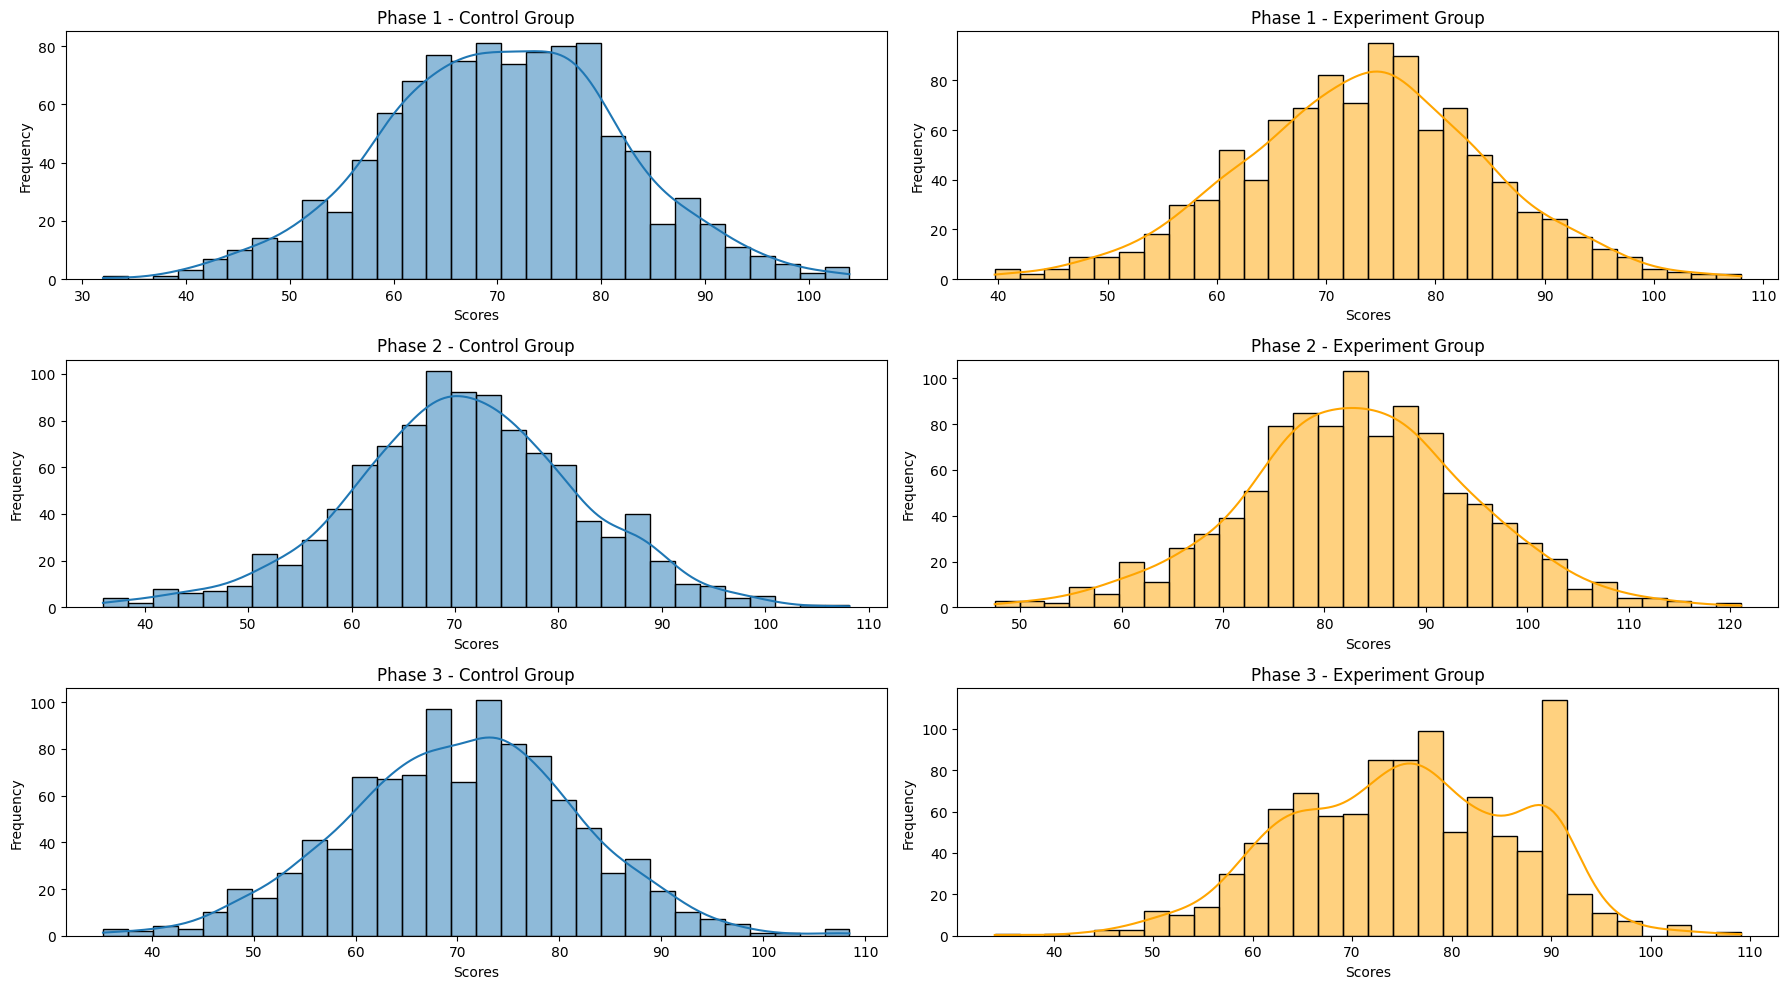

,Phase,Group,Mean,Variance,Skewness,Kurtosis
0,Phase 1,Control,70.345451,130.687089,-0.036573,-0.023902
1,Phase 1,Experiment,73.392600,126.266301,-0.057096,0.051526
2,Phase 2,Control,70.872452,123.521660,-0.104214,0.253952
3,Phase 2,Experiment,83.189766,129.785525,-0.026353,0.242408
4,Phase 3,Control,70.399140,126.268571,-0.055229,0.077961
5,Phase 3,Experiment,75.265223,128.812274,-0.151862,-0.402578


In [8]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

# Proceeding with the analysis
stat_properties_all = []

for phase in ['Phase 1', 'Phase 2', 'Phase 3']:
    for group in ['Control', 'Experiment']:
        data = df_phases[df_phases['Phase'] == phase][group]

        # Computing properties
        mean = np.mean(data)
        variance = np.var(data)
        skewness = scipy.stats.skew(data)
        kurtosis = scipy.stats.kurtosis(data)

        stat_properties = {
            'Phase': phase,
            'Group': group,
            'Mean': mean,
            'Variance': variance,
            'Skewness': skewness,
            'Kurtosis': kurtosis
        }
        stat_properties_all.append(stat_properties)

# Convert results to DataFrame
df_stat_properties = pd.DataFrame(stat_properties_all)

# Plotting Data Distribution for each Phase and Group
plt.figure(figsize=(18, 10))
for i, phase in enumerate(['Phase 1', 'Phase 2', 'Phase 3']):
    plt.subplot(3, 2, i*2 + 1)
    sns.histplot(df_phases[df_phases['Phase'] == phase]['Control'], kde=True, bins=30)
    plt.title(f'{phase} - Control Group')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')

    plt.subplot(3, 2, i*2 + 2)
    sns.histplot(df_phases[df_phases['Phase'] == phase]['Experiment'], kde=True, color='orange', bins=30)
    plt.title(f'{phase} - Experiment Group')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

df_stat_properties


Data distribution analysis on the phases would be a valuable addition, providing deeper insights into the underlying characteristics of the data. Given that we have two groups (Control and Experiment) for each phase, we'll analyze the distribution and statistical properties for each group in every phase.



### Visualization:

The histograms visually display the distributions of scores for both the Control and Experiment groups across the three phases. The orange plots represent the Experiment group, while the blue plots depict the Control group. Observing these plots can provide a preliminary understanding of the underlying distribution, its central tendency, and its spread.

### Statistical Properties:

From the table:

1. **Mean**: This gives us the average score for each group in every phase. We can observe that the Experiment group has a higher average score in each phase compared to the Control group.
2. **Variance**: Represents the variability or spread of the scores. Notably, the variance for the Experiment group in Phase 3 is much higher than in other phases, suggesting more variability or potential anomalies in the data.
3. **Skewness**: Measures the asymmetry of the score distribution. Positive values indicate a distribution that is skewed right, while negative values denote a distribution skewed left.
4. **Kurtosis**: Gauges the "tailedness" of the score distribution. Positive kurtosis indicates a distribution with heavier tails (more outliers), while negative kurtosis suggests lighter tails.

### Insights:

- Both Control and Experiment groups seem to be fairly symmetric in their distribution (skewness values close to 0).
- The Experiment group in Phase 3 exhibits negative kurtosis, indicating the presence of fewer outliers compared to a normal distribution.
- The increased variance in Phase 3 for the Experiment group further hints at potential tampering, consistent with our earlier analyses.

This section provides an overview of the statistical characteristics of the data and offers another lens through which potential issues or anomalies can be detected.

## Visual Inspection of Data Points

Visual inspection can be a powerful tool to spot anomalies or patterns in the data. Here, we inspect the scores of the experimental group in Phase 3 using a line plot.


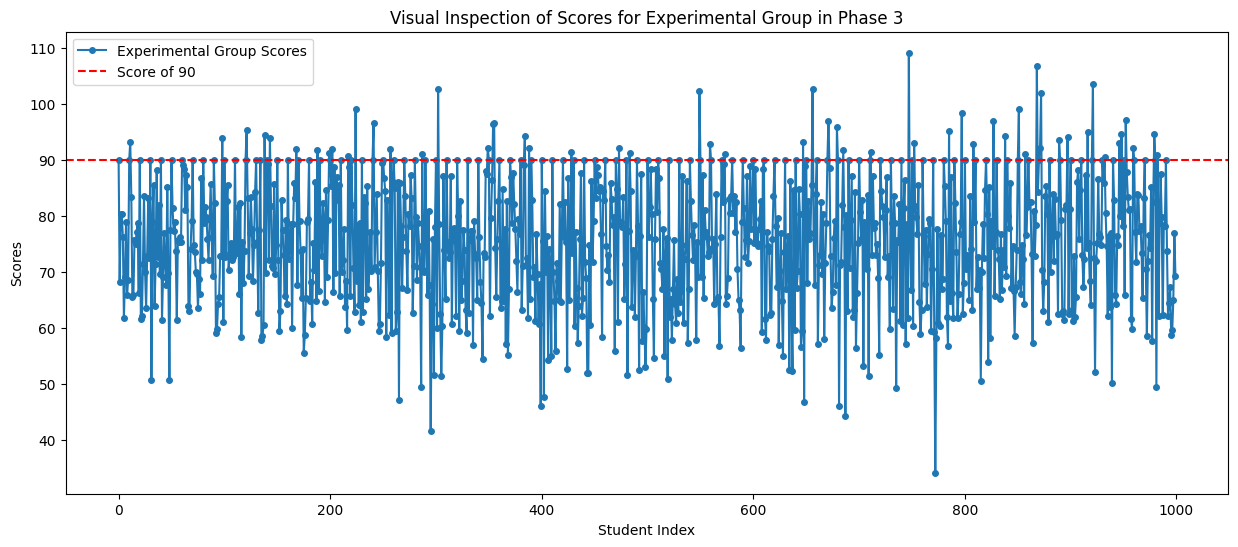

In [9]:

# Visual inspection of the experimental group in Phase 3 using a line plot

plt.figure(figsize=(15, 6))
phase_3_experiment = df_phases[df_phases['Phase'] == 'Phase 3']['Experiment']
plt.plot(phase_3_experiment, label="Experimental Group Scores", marker='o', markersize=4)
plt.axhline(y=90, color='r', linestyle='--', label="Score of 90")
plt.title('Visual Inspection of Scores for Experimental Group in Phase 3')
plt.ylabel('Scores')
plt.xlabel('Student Index')
plt.legend()
plt.show()



## Conclusion

The results from the three phases exhibit patterns that raise concerns regarding data authenticity and potential manipulation:

1. **Suspiciously Consistent p-values**: Extremely small and consistent p-values across multiple phases might indicate potential manipulation.
2. **Contradictory Effect Sizes**: The unusually large effect size in Phase 2 contradicts prior domain knowledge.
3. **Dataset Anomalies**: The introduced pattern in Phase 3, with every 10th student in the experimental group scoring exactly 90, stands out as a clear anomaly.

This analysis underscores the importance of thorough scrutiny in academic research to ensure the authenticity of findings and maintain trust in the scientific community.

In real-world scenarios, forensic statistical tools and a deeper analysis would be required to detect anomalies.


# Ethical and Practical Considerations in Academic Research

### Reproducibility in Research
Reproducibility is a cornerstone of scientific research. One study with significant results isn't conclusive. It's when multiple researchers, across different settings, can reproduce similar results that a finding becomes more credible. Reproducibility ensures that findings are robust and not a result of random chance or specific conditions of a single study.

### Caution Against P-Hacking
"P-hacking" or "data dredging" refers to the questionable practice where researchers manipulate or choose their data/methods until they get a significant result. This undermines the integrity of the scientific process and can lead to false conclusions.

### Data Authenticity Tools
In the era of digital research, tools and platforms have been developed to ensure data provenance and authenticity. Researchers are encouraged to leverage these tools to validate their data sources and maintain the trustworthiness of their findings.

### Ethical Implications of Data Manipulation
Data manipulation in academic research has far-reaching consequences. Beyond the academic community, manipulated data can influence policy decisions, shift public opinion, and misguide future research. Researchers have an ethical obligation to ensure the authenticity and integrity of their data.
